# Ex 9 - Neural Networks

### Adithya Vedhamani | BTech CSE IoT(A) | 21011102009

1.Implement a neural network from scratch. Take any dataset. Run minimum 200 iterations and get the result. Use the gradient descent optimization technique for weight optimization.

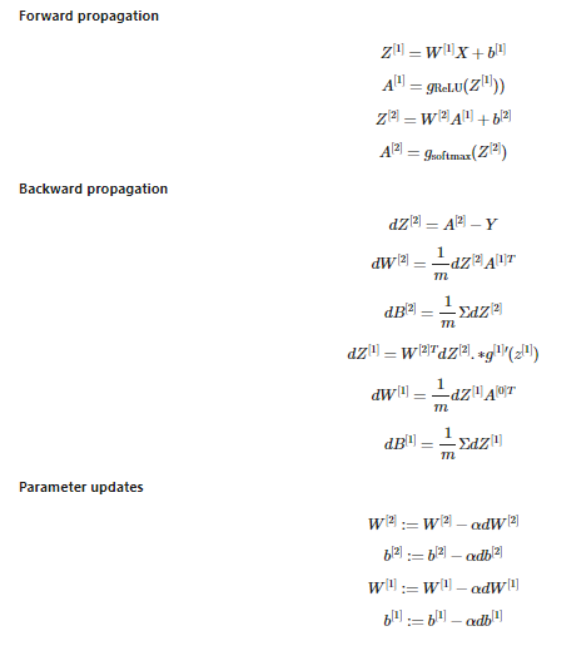

2.For the same dataset, build a neural network using keras library. Run the same number
of epochs and compare the results obtained with your model vs the built-in keras
mode. 

### Importing the libraries and reading the dataset

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping


In [21]:
df = pd.read_csv("diabetes.csv")

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [23]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Checking for Null Values

In [24]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Split Training and Test Data

In [25]:
X=df.drop('Outcome',axis=1)
y=df['Outcome'].values.reshape(X.shape[0], 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

### Standard Scaler

In [26]:
sc = StandardScaler()
sc.fit(X_train)
X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [27]:
print(X_train.shape)
print(X_test.shape)


(614, 8)
(154, 8)


### Implementing Neural Network
### Initializing Parameters

In [28]:
def initialize_parameters(layers):
    np.random.seed(42) 
    parameters = {}
    parameters["W1"] = np.random.randn(layers[0], layers[1]) 
    parameters['b1']  = np.random.randn(layers[1],)
    parameters['W2'] = np.random.randn(layers[1], layers[2]) 
    parameters['b2'] = np.random.randn(layers[2],)
    return parameters

### Rectified Linear Unit Activation Function, Sigmoid and ETA

In [29]:
def relu(Z):
    return np.maximum(0, Z)

def relu_derivative(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

def eta(x):
    ETA = 0.00000001
    return np.maximum(x, ETA)

def sigmoid(Z):
    return 1/(1+np.exp(-Z))


### Entropy Loss

In [30]:
def entropy_loss(y, yhat):
    nsample = len(y)
    yhat_inv = 1.0 - yhat
    y_inv = 1.0 - y
    yhat = eta(yhat) 
    yhat_inv = eta(yhat_inv) 
    loss = -1/nsample * (np.sum(np.multiply(np.log(yhat), y) + np.multiply((y_inv), np.log(yhat_inv))))
    return loss

### Forward Propagation

In [31]:
def forward_propagation(X, parameters, y):
    Z1 = X.dot(parameters['W1']) + parameters['b1']
    A1 = relu(Z1)
    Z2 = A1.dot(parameters['W2']) + parameters['b2']
    yhat = sigmoid(Z2)
    loss = entropy_loss(y, yhat)

    parameters['Z1'] = Z1
    parameters['Z2'] = Z2
    parameters['A1'] = A1

    return yhat, loss

### Backward Propagation

In [32]:
def backward_propagation(parameters, yhat, X, y, lr):

    y_inv = 1 - y
    yhat_inv = 1 - yhat

    dl_wrt_yhat = np.divide(y_inv, eta(yhat_inv)) - np.divide(y, eta(yhat))
    dl_wrt_sig = yhat * (yhat_inv)
    dl_wrt_z2 = dl_wrt_yhat * dl_wrt_sig

    dl_wrt_A1 = dl_wrt_z2.dot(parameters['W2'].T)
    dl_wrt_w2 = parameters['A1'].T.dot(dl_wrt_z2)
    dl_wrt_b2 = np.sum(dl_wrt_z2, axis=0, keepdims=True)

    dl_wrt_z1 = dl_wrt_A1 * relu_derivative(parameters['Z1'])
    dl_wrt_w1 = X.T.dot(dl_wrt_z1)
    dl_wrt_b1 = np.sum(dl_wrt_z1, axis=0, keepdims=True)

    parameters['W1'] = parameters['W1'] - lr * dl_wrt_w1
    parameters['W2'] = parameters['W2'] - lr * dl_wrt_w2
    parameters['b1'] = parameters['b1'] - lr * dl_wrt_b1
    parameters['b2'] = parameters['b2'] - lr * dl_wrt_b2


### Train Neural Network

In [33]:
def train_neural_network(X_train, y_train, layers, lr=0.005, epochs=100):
    parameters = initialize_parameters(layers) 
    losses = []

    for i in range(epochs):
        yhat, loss = forward_propagation(X_train, parameters, y_train)
        backward_propagation(parameters, yhat, X_train, y_train, lr)
        losses.append(loss)
    
    return parameters, losses


### Prediction and Accuracy

In [34]:
def predict(X, parameters):

    Z1 = X.dot(parameters['W1']) + parameters['b1']
    A1 = relu(Z1)
    Z2 = A1.dot(parameters['W2']) + parameters['b2']
    pred = sigmoid(Z2)
    return np.round(pred) 

def calculate_accuracy(y, yhat):

    acc = int(sum(y == yhat) / len(y) * 100)
    return acc


### Loss Curve Plotting

In [35]:
def plot_loss_curve(losses):

    import matplotlib.pyplot as plt
    plt.plot(losses)
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.title("Loss Curve for Training")
    plt.show()


### Usage

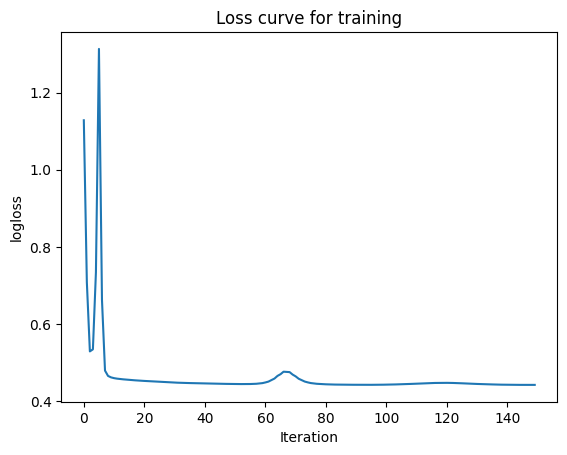

Accuracy of Training Data: 78
Accuracy of Test Data: 75


In [42]:
parameters, losses = fit(X_train, y_train, layers=[8, 5, 1], lr=0.005, epochs=150)
plot_loss(losses)
prediction = predict(X_train, parameters)
predictions = predict(X_test, parameters)
train_accuracy = acc(y_train, prediction)
accuracy = acc(y_test, predictions)

print("Accuracy of Training Data:", train_accuracy)
print("Accuracy of Test Data:", accuracy)

### Implementing Neural Netowork using Keras

### 2) For the same dataset, build a neural network using keras library. Run the same number of epochs and compare the results obtained with your model vs the built-in keras model.

### Model Creating and Training

In [48]:
def create_model(input_dim):
    model = Sequential([
        Dense(5, input_dim=input_dim, activation='relu'),  # Hidden layer with 5 nodes and ReLU activation
        Dense(1, activation='sigmoid')  # Output layer with 1 node and Sigmoid activation for binary classification
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

def train_model(model, X_train, y_train, epochs, batch_size):
    early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, verbose=0, validation_split=0.2, callbacks=[early_stopping])
    return history




### Model Evaluation

In [ ]:
def evaluate_model(model, X_test, y_test):
    loss, accuracy = model.evaluate(X_test, y_test)
    return loss, accuracy


### Split the dataset into training and testing sets & Feature Scaling

In [49]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Model Training and Evaluation

In [51]:

model = create_model(input_dim=X_train.shape[1])

# Train the model
epochs = 150
batch_size = 32
history = train_model(model, X_train_scaled, y_train, epochs=epochs, batch_size=batch_size)

#Evaluate the model on test data
loss, accuracy = evaluate_model(model, X_test_scaled, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


5/5 [==============================] - 0s 2ms/step - loss: 0.5089 - accuracy: 0.7403
Test Loss: 0.5088787078857422
Test Accuracy: 0.7402597665786743


### Plotting

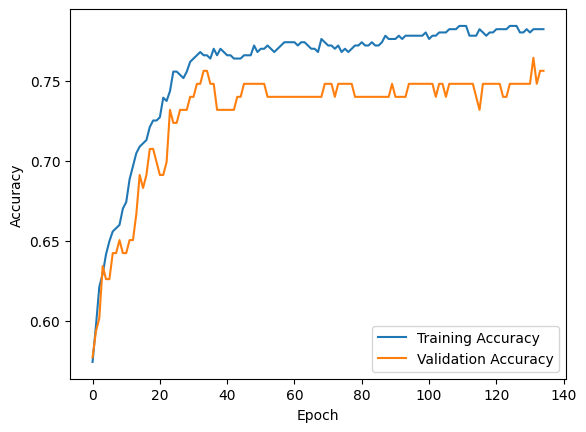

In [50]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Conclusion

1. **Training from Scratch:**
   - Accuracy: 75%

2. **Using Keras with KMeans:**
   - Accuracy: 74.03%

Training a neural network from scratch achieved a slightly higher accuracy (75%) compared to using Keras with KMeans (74.03%). This suggests that while KMeans clustering can be helpful for preprocessing and feature engineering, it may not always lead to better performance compared to training a neural network from scratch.